Original train shape: (60000, 28, 28)
Original test shape: (10000, 28, 28)
Resized train shape: (60000, 10, 10, 1)
Resized test shape: (10000, 10, 10, 1)


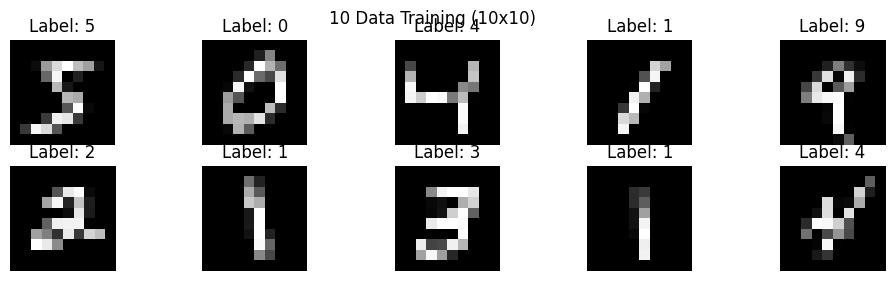

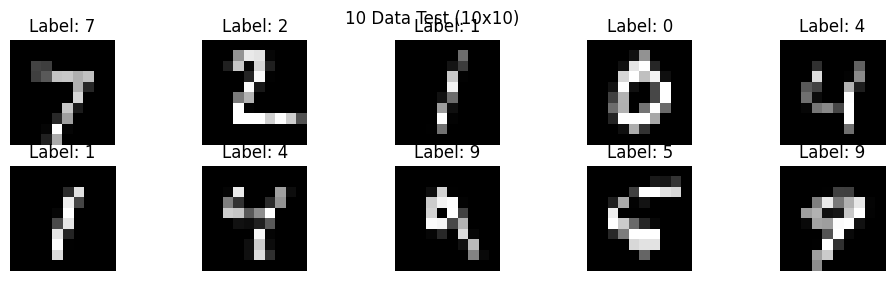

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Original train shape:", x_train.shape)  # (60000, 28, 28)
print("Original test shape:", x_test.shape)    # (10000, 28, 28)

# 2. Resize ke 10x10 pixel (tambahkan channel grayscale)
x_train_resized = tf.image.resize(x_train[..., tf.newaxis], [10, 10])
x_test_resized  = tf.image.resize(x_test[..., tf.newaxis], [10, 10])

# Normalisasi ke 0–1
x_train_resized = tf.cast(x_train_resized, tf.float32) / 255.0
x_test_resized  = tf.cast(x_test_resized, tf.float32) / 255.0

print("Resized train shape:", x_train_resized.shape)  # (60000, 10, 10, 1)
print("Resized test shape:", x_test_resized.shape)    # (10000, 10, 10, 1)

# 3. Plot 10 data training
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_resized[i,:,:,0], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("10 Data Training (10x10)")
plt.show()

# 4. Plot 10 data test
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_resized[i,:,:,0], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.suptitle("10 Data Test (10x10)")
plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 8)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,538 (17.73 KB)

 Trainable params: 4,538 (17.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8473 - loss: 0.5276 - val_accuracy: 0.9261 - val_loss: 0.2475
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9265 - loss: 0.2393 - val_accuracy: 0.9409 - val_loss: 0.1960
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9393 - loss: 0.1975 - val_accuracy: 0.9477 - val_loss: 0.1679
313/313 - 1s - 3ms/step - accuracy: 0.9477 - loss: 0.1679
Test accuracy: 0.947700023651123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


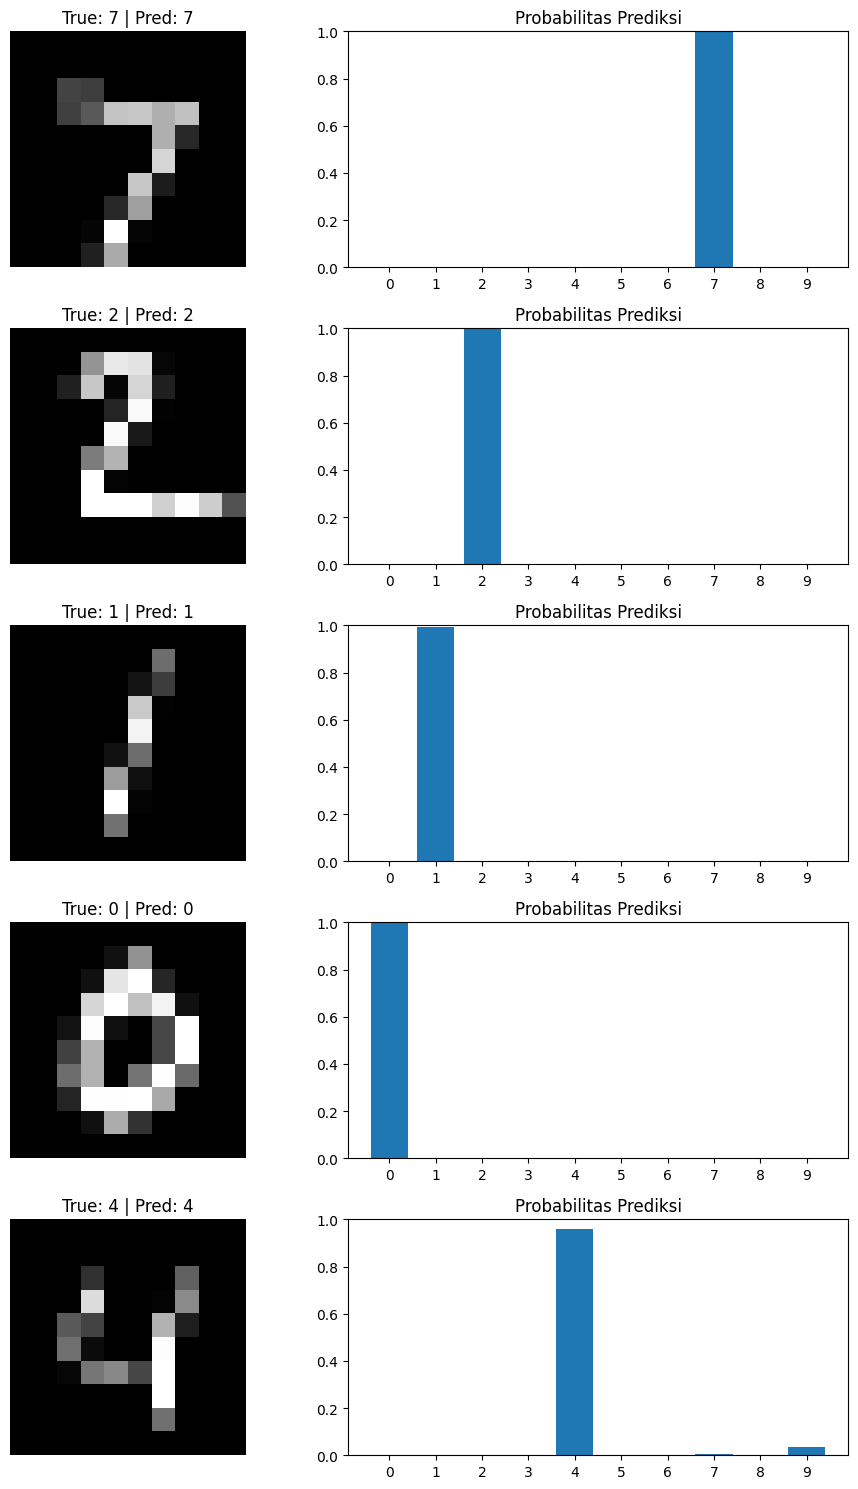

In [4]:
# 2. Bangun model CNN sederhana
model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,10,1)),   # definisi input
    tf.keras.layers.Conv2D(8, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10)  # logits
])

# 3. Compile model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Tambahkan model summary
model.summary()

# 4. Training model
history = model.fit(x_train_resized, y_train, epochs=3,
                    validation_data=(x_test_resized, y_test))

# 5. Evaluasi model
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print("Test accuracy:", test_acc)

# 6. Prediksi contoh (5 gambar pertama dari test set)
logits = model.predict(x_test_resized[:5])
probs = tf.nn.softmax(logits).numpy()
pred_classes = probs.argmax(axis=1)

# 7. Plot 5 gambar prediksi + probabilitas
fig, axes = plt.subplots(5, 2, figsize=(10,15))

for i in range(5):
    # Gambar input
    axes[i,0].imshow(x_test_resized[i,:,:,0], cmap="gray")
    axes[i,0].set_title(f"True: {y_test[i]} | Pred: {pred_classes[i]}")
    axes[i,0].axis("off")
    
    # Bar chart probabilitas
    axes[i,1].bar(range(10), probs[i])
    axes[i,1].set_xticks(range(10))
    axes[i,1].set_title("Probabilitas Prediksi")
    axes[i,1].set_ylim(0,1)

plt.tight_layout()
plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
Original train shape: (60000, 28, 28)
Original test shape: (10000, 28, 28)
Resized train shape: (60000, 10, 10, 1)
Resized test shape: (10000, 10, 10, 1)


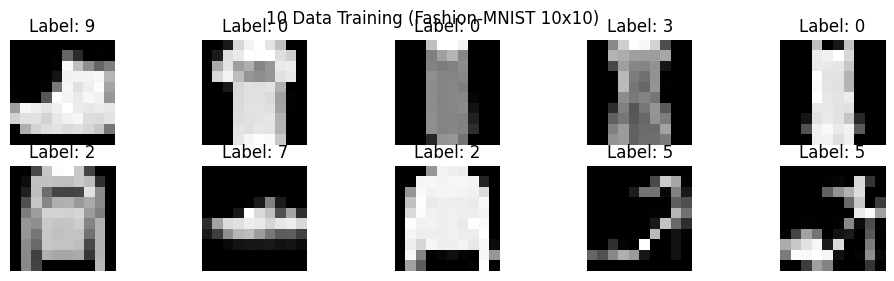

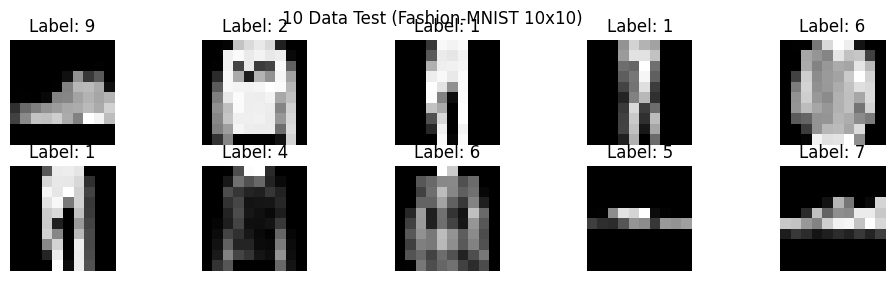

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 8)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,538 (17.73 KB)

 Trainable params: 4,538 (17.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7061 - loss: 0.8041 - val_accuracy: 0.7573 - val_loss: 0.6387
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7876 - loss: 0.5826 - val_accuracy: 0.7863 - val_loss: 0.5759
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8098 - loss: 0.5262 - val_accuracy: 0.8125 - val_loss: 0.5244
313/313 - 1s - 4ms/step - accuracy: 0.8125 - loss: 0.5244
Test accuracy: 0.8125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


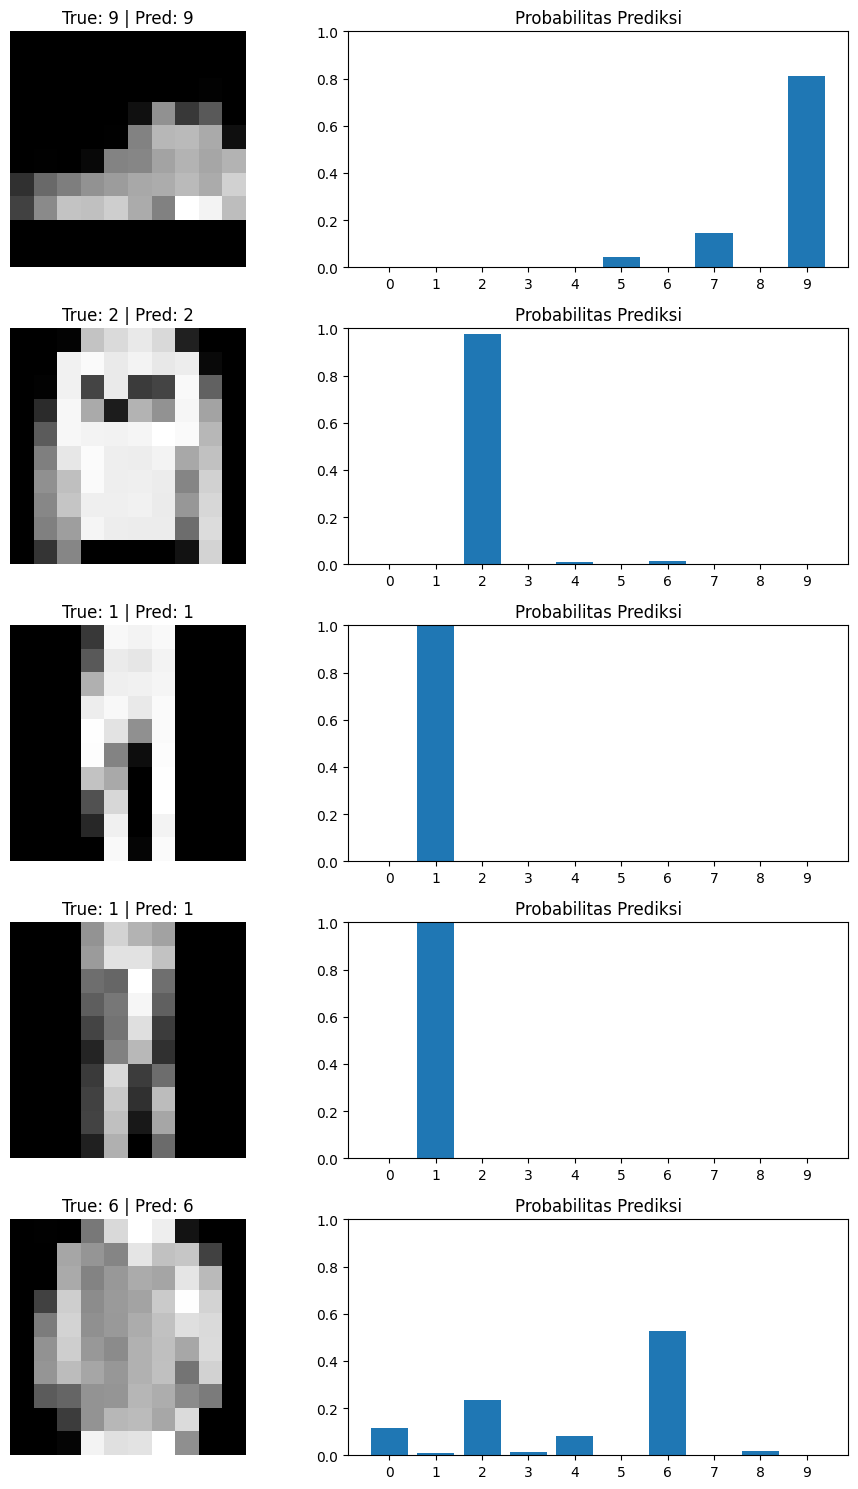

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("Original train shape:", x_train.shape)  # (60000, 28, 28)
print("Original test shape:", x_test.shape)    # (10000, 28, 28)

# 2. Resize ke 10x10 pixel (tambahkan channel grayscale)
x_train_resized = tf.image.resize(x_train[..., tf.newaxis], [10, 10])
x_test_resized  = tf.image.resize(x_test[..., tf.newaxis], [10, 10])

# Normalisasi ke 0–1
x_train_resized = tf.cast(x_train_resized, tf.float32) / 255.0
x_test_resized  = tf.cast(x_test_resized, tf.float32) / 255.0

print("Resized train shape:", x_train_resized.shape)  # (60000, 10, 10, 1)
print("Resized test shape:", x_test_resized.shape)    # (10000, 10, 10, 1)

# 3. Plot 10 data training
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_resized[i,:,:,0], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("10 Data Training (Fashion-MNIST 10x10)")
plt.show()

# 4. Plot 10 data test
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_resized[i,:,:,0], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.suptitle("10 Data Test (Fashion-MNIST 10x10)")
plt.show()

# 5. Bangun model CNN sederhana (opsi 1: Input layer)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,10,1)),
    tf.keras.layers.Conv2D(8, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10)  # logits untuk 10 kelas fashion
])

# Compile model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Model summary
model.summary()

# 6. Training model
history = model.fit(x_train_resized, y_train, epochs=3,
                    validation_data=(x_test_resized, y_test))

# 7. Evaluasi model
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print("Test accuracy:", test_acc)

# 8. Prediksi 5 gambar test
logits = model.predict(x_test_resized[:5])
probs = tf.nn.softmax(logits).numpy()
pred_classes = probs.argmax(axis=1)

# Plot 5 gambar prediksi + probabilitas
fig, axes = plt.subplots(5, 2, figsize=(10,15))

for i in range(5):
    # Gambar input
    axes[i,0].imshow(x_test_resized[i,:,:,0], cmap="gray")
    axes[i,0].set_title(f"True: {y_test[i]} | Pred: {pred_classes[i]}")
    axes[i,0].axis("off")
    
    # Bar chart probabilitas
    axes[i,1].bar(range(10), probs[i])
    axes[i,1].set_xticks(range(10))
    axes[i,1].set_title("Probabilitas Prediksi")
    axes[i,1].set_ylim(0,1)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


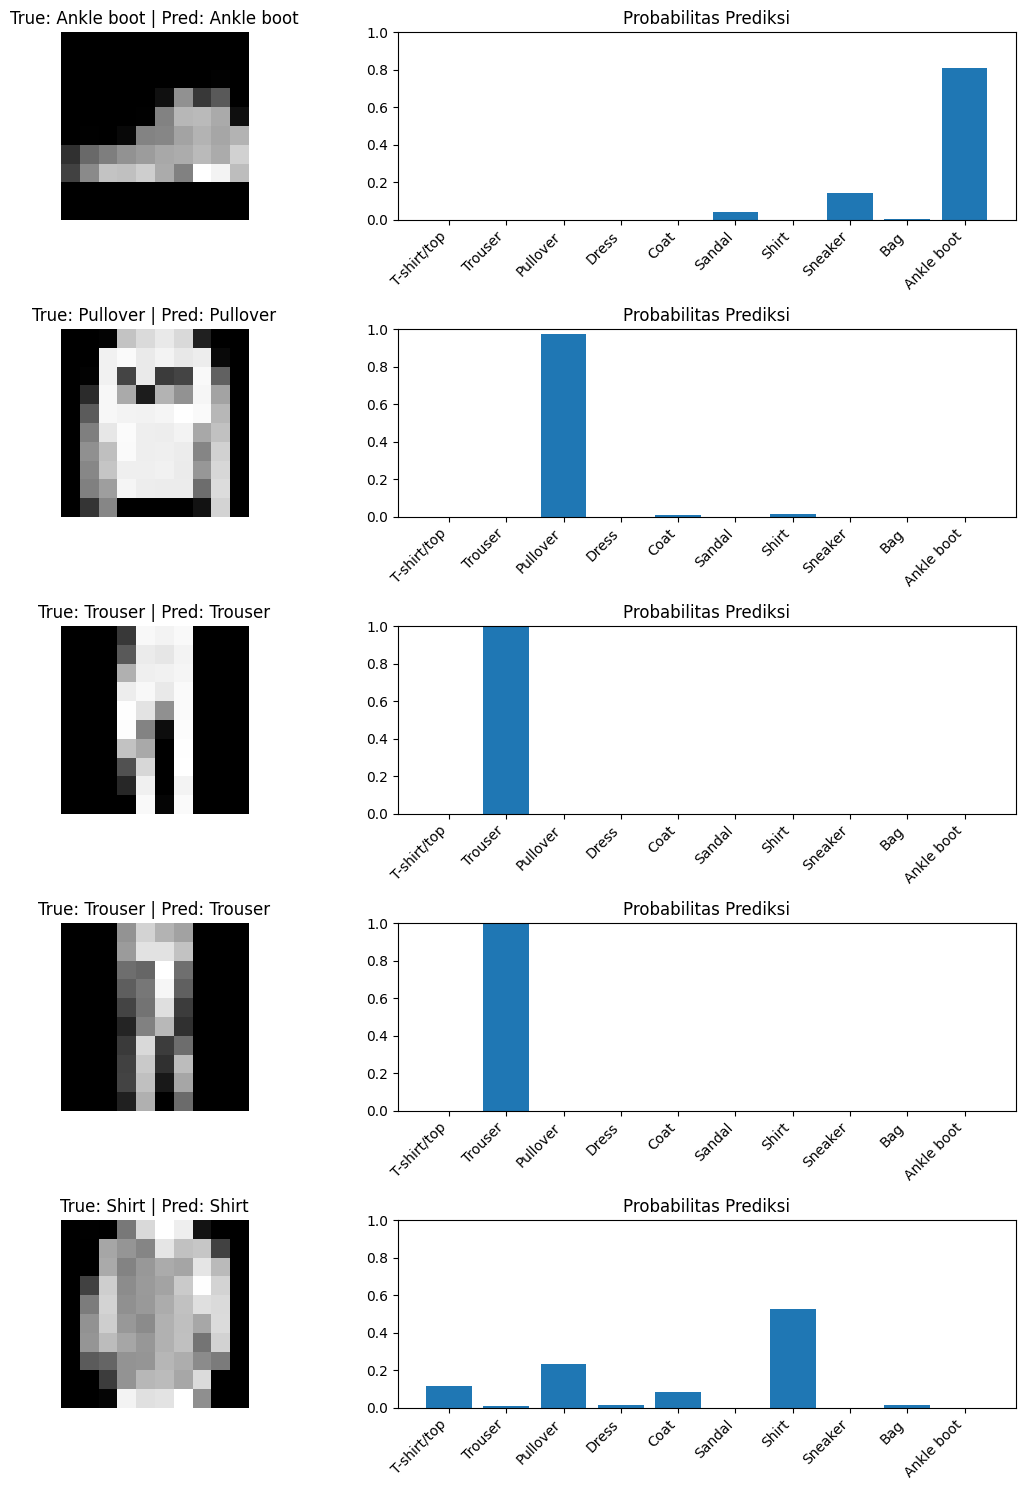

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Mapping label angka → nama kelas Fashion-MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Prediksi 5 gambar test
logits = model.predict(x_test_resized[:5])
probs = tf.nn.softmax(logits).numpy()
pred_classes = probs.argmax(axis=1)

# Plot 5 gambar prediksi + probabilitas dengan nama kelas
fig, axes = plt.subplots(5, 2, figsize=(12,15))

for i in range(5):
    # Gambar input
    axes[i,0].imshow(x_test_resized[i,:,:,0], cmap="gray")
    axes[i,0].set_title(f"True: {class_names[y_test[i]]} | Pred: {class_names[pred_classes[i]]}")
    axes[i,0].axis("off")
    
    # Bar chart probabilitas dengan nama kelas
    axes[i,1].bar(range(len(class_names)), probs[i])
    axes[i,1].set_xticks(range(len(class_names)))
    axes[i,1].set_xticklabels(class_names, rotation=45, ha="right")
    axes[i,1].set_title("Probabilitas Prediksi")
    axes[i,1].set_ylim(0,1)

plt.tight_layout()
plt.show()
